# Assignment 2: Computization & Visualisation of DA (IE6600)

In [75]:
# importing all the necessary libraries into the workspace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#This command is to ignore all the warnings 
warnings.filterwarnings("ignore")

# loading/reading of the datasets into a dataframe (df)
df_vehicle= pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Computization and Visualisation/Assignment-2/vehicles.csv', low_memory=False)

#displaying the first 5 rows of the dataframe
display(df_vehicle.head())

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


# Question 1: Dataset loading , cleaning & filling missing values

In [76]:
#gives out the count of the columns having the values (includes null values also)
print(df_vehicle.isnull().sum())

#gives the information of the columns.
df_vehicle.info()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31704
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40081 non-null  float64
 1   barrelsA08       40081 non-null  float64
 2   charge120        40081 non-null  float64
 3   charge240        40081 non-null  float64
 4   city08           40081 non-null  int64  
 5   city08U          40081 non-null  float64
 6   cityA08          40081 non-null  int64  
 7   cityA08U         40081 non-null  float64
 8   cityCD           40081 non-null  float64
 9   cityE            40081 non-null  float64
 10  cityUF           40081 non-null  float64
 11  co2              40081 non-null  int64  
 1

In [77]:
#Filling in zeros for the missing NaN values 
df_vehicle.fillna(0, inplace=True)
print(df_vehicle.head(5))


   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...        0         0         0.0          0   
1       0.0     0.0    0.0  ...        0         0         0.0          0   
2       0.0     0.0    0.0  ...        0         0         0.0          0   
3       0.0     0.0    0.0  ...        0         0         0.0          0   
4       0.0     0.0    0.0  ...        0         0         0.0          0   

                      createdOn                    modifiedOn  startStop  \
0  T

In [78]:
#dropping columns the necessary columns since they had contained less non-zero values.
df_vehicle.drop(columns=["charge120" , "guzzler" , "tCharger" , "sCharger" , "fuelType2" , "rangeA", "evMotor", "c240Dscr" , "c240bDscr"], inplace=True)

#Before dropping the total number of columns were 83 and after dropping it is 74
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40081 non-null  float64
 1   barrelsA08       40081 non-null  float64
 2   charge240        40081 non-null  float64
 3   city08           40081 non-null  int64  
 4   city08U          40081 non-null  float64
 5   cityA08          40081 non-null  int64  
 6   cityA08U         40081 non-null  float64
 7   cityCD           40081 non-null  float64
 8   cityE            40081 non-null  float64
 9   cityUF           40081 non-null  float64
 10  co2              40081 non-null  int64  
 11  co2A             40081 non-null  int64  
 12  co2TailpipeAGpm  40081 non-null  float64
 13  co2TailpipeGpm   40081 non-null  float64
 14  comb08           40081 non-null  int64  
 15  comb08U          40081 non-null  float64
 16  combA08          40081 non-null  int64  
 17  combA08U    

# Question 2: Using matplotlib use charts of your choice and create visualizations(use at least 20 features) and create 15 charts.

# Chart Type: Bar Chart

Chart-1: Bar Chart: annual petroleum consumption Vs Drive 
-------------------------------------------------------------


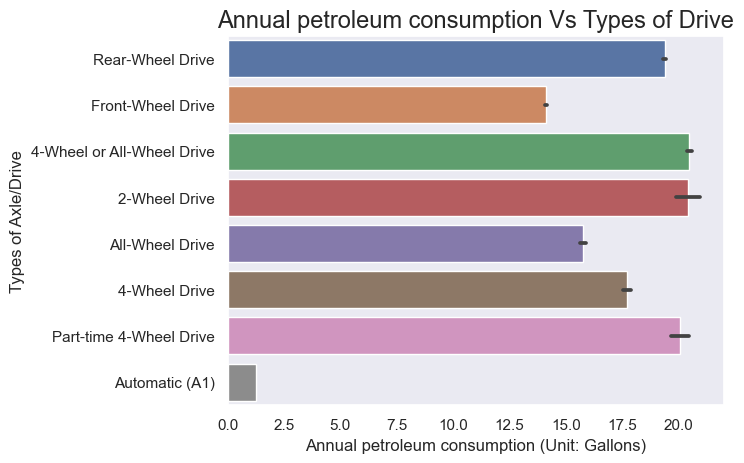

In [79]:
#Chart 1: Comparision of the annual petroleum consumption Vs Drive (2-Wheeldrive & 4-Wheeldrive) 

#Dropping the zero values from the column 'drive'
Dropped_values_drive = [0]
df_vehicle = df_vehicle[~df_vehicle['drive'].isin(Dropped_values_drive)]

# plotting a bar chart
sns.barplot(x=df_vehicle['barrels08'], y=df_vehicle['drive'])

print('Chart-1: Bar Chart: annual petroleum consumption Vs Drive ')
print("-------------------------------------------------------------")

# Labeling of X&Y axis and the title
plt.xlabel('Annual petroleum consumption (Unit: Gallons)' , fontsize=12)
plt.ylabel('Types of Axle/Drive' , fontsize=12)
plt.title('Annual petroleum consumption Vs Types of Drive' , fontsize=17)

# Displays the bar chart
plt.show()

#Insights: 
#1. From the comparision of vehicle using different drives, it is found that the "Automatic" drive vehicle uses very less fuel when compared to all other drive vehicles.
#2. The fuel usage is almost equal to that of partial or complete 4-wheel drive
#3. Among the 2 wheel drive vehicles, the front wheel drive is the most efficient.
#4. Automatic vehicles consume approxmately 13% less when compared to other axle vehicles.

 
Chart-2: Bar Chart- Chart comparision of the Fuel Economic score with the car brand names
 
-------------------------------------------------------------
 FEscore range: 1-Worst Fuel Economy 10-Best Fuel Economy
-------------------------------------------------------------


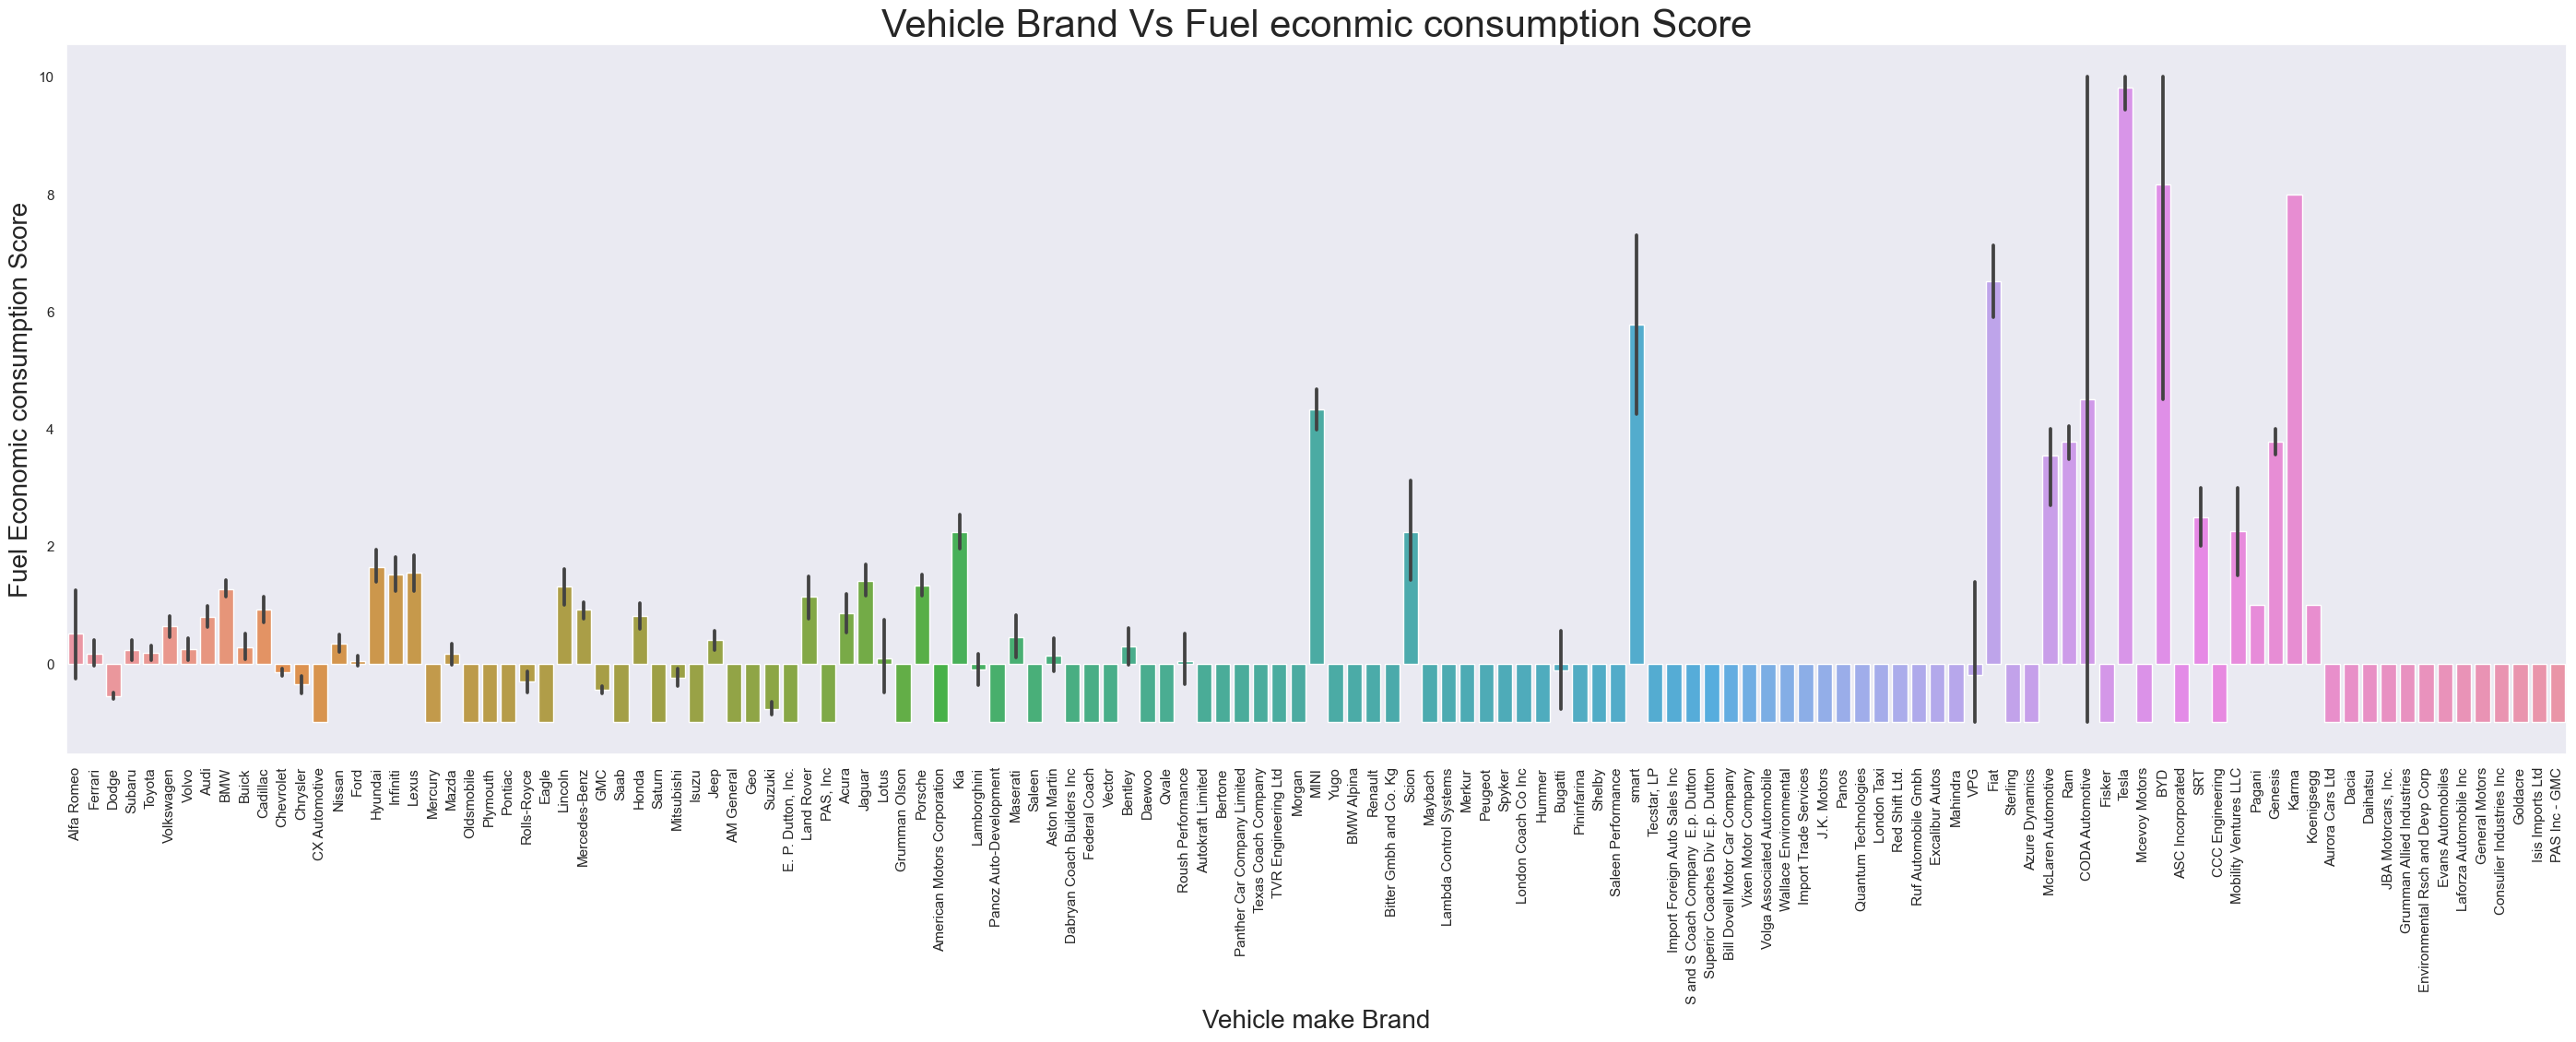

In [80]:
# Chart 2: Chart comparision of the Fuel Economic score with the car brand names.

#setting up the size of the graph so that it can accomodate all the x axis labels.
plt.figure(figsize=(35, 10))

#Setting up the bar chart
sns.barplot(x=df_vehicle["make"], y=df_vehicle["feScore"] )
print(' ')
print('Chart-2: Bar Chart- Chart comparision of the Fuel Economic score with the car brand names')
print(' ')

# labelling the axes and the title
plt.xlabel('Vehicle make Brand' , fontsize=20)
plt.ylabel('Fuel Economic consumption Score' , fontsize=20)
plt.title('Vehicle Brand Vs Fuel econmic consumption Score' , fontsize=30)

print("-------------------------------------------------------------")
print(" FEscore range: 1-Worst Fuel Economy" , "10-Best Fuel Economy")
print("-------------------------------------------------------------")

#Rotating the x axis labels to accomodate all the brand names and avoid overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()


#Insights
# 1. Tesla has the maximum/best fuel economy when compared to its competetors, as it has the maximum intensity at score 10
# and the second best is found to be BYD, a touch over 8.
# 2. The average FE score across top brands with large sample size is 3.
# 3. Companies like Ford and Aston Martin has the least fuel economy score of decimals over 0.


Chart-3: Bar Chart- Chart comparision of the Fuel cost with the corresponding number of cylinders
-------------------------------------------------------------------------------------------------


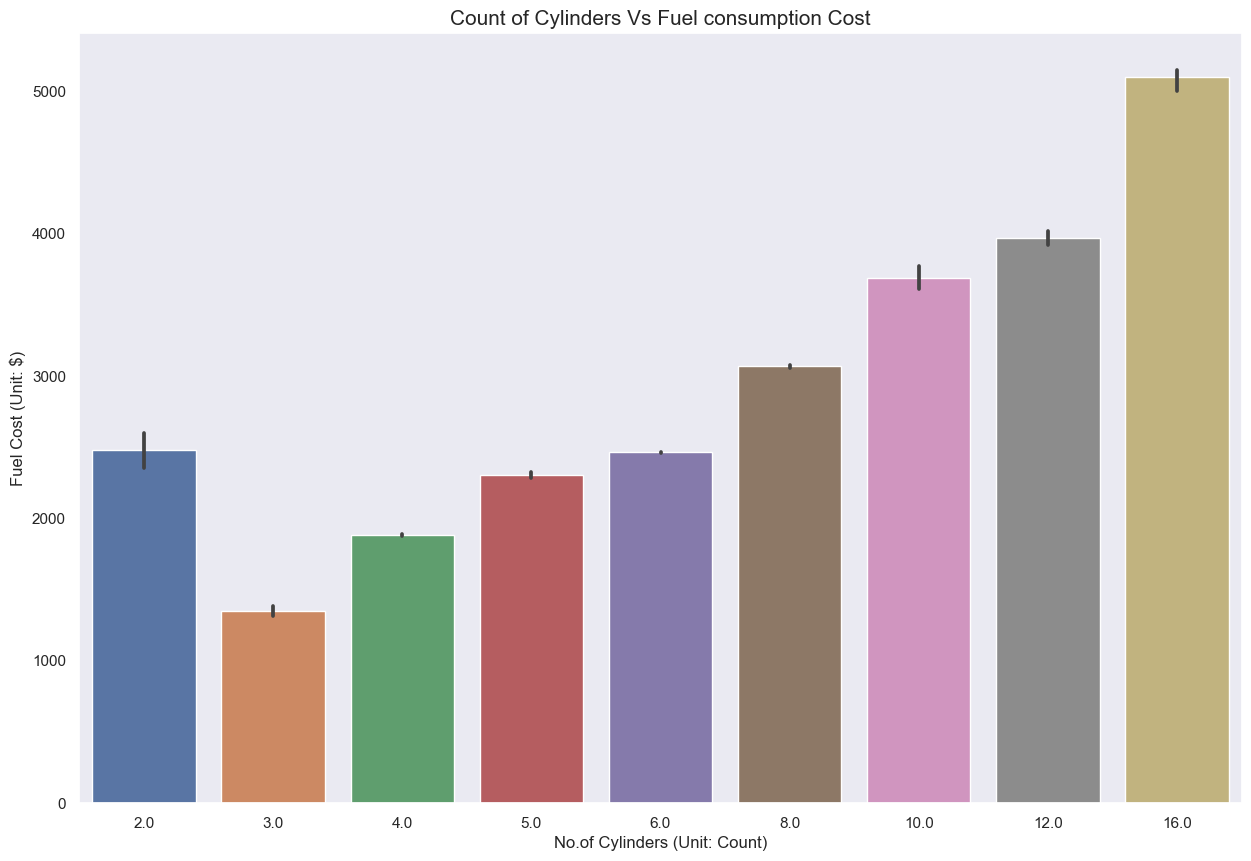

In [81]:
# Chart 3: Chart comparision of the Fuel consumption cost with the number of cylinders present in the engine.

#Relinquishing the zero values from the column 'cylinders' as they dont have any effect on the analysis
Relinquish_values_cylinders = [0]
df_vehicle = df_vehicle[~df_vehicle['cylinders'].isin(Relinquish_values_cylinders )]

#setting up the size of the graph so that it can accomodate all the x axis labels.
plt.figure(figsize=(15, 10))

sns.barplot(x=df_vehicle["cylinders"], y=df_vehicle["fuelCost08"])

print('Chart-3: Bar Chart- Chart comparision of the Fuel cost with the corresponding number of cylinders')
print("-------------------------------------------------------------------------------------------------")

# Adds the necessary labels and the title
plt.xlabel('No.of Cylinders (Unit: Count)' , fontsize=12)
plt.ylabel('Fuel Cost (Unit: $)' , fontsize=12)
plt.title('Count of Cylinders Vs Fuel consumption Cost' , fontsize=15)

# Displaying the plot
plt.show()

#Insights:
# 1. The fuel cost incured rises exponentially, when the number of cylinders in the engine of the car tends to increase.
# 2. Out of the lot, the engine have 3 cylinders is more fuel efficient when compared to the others.

 
Chart-4: Bar Chart- Chart comparision between ATV types and the amount of spending/saving to an average car
-----------------------------------------------------------------------------------------------------------


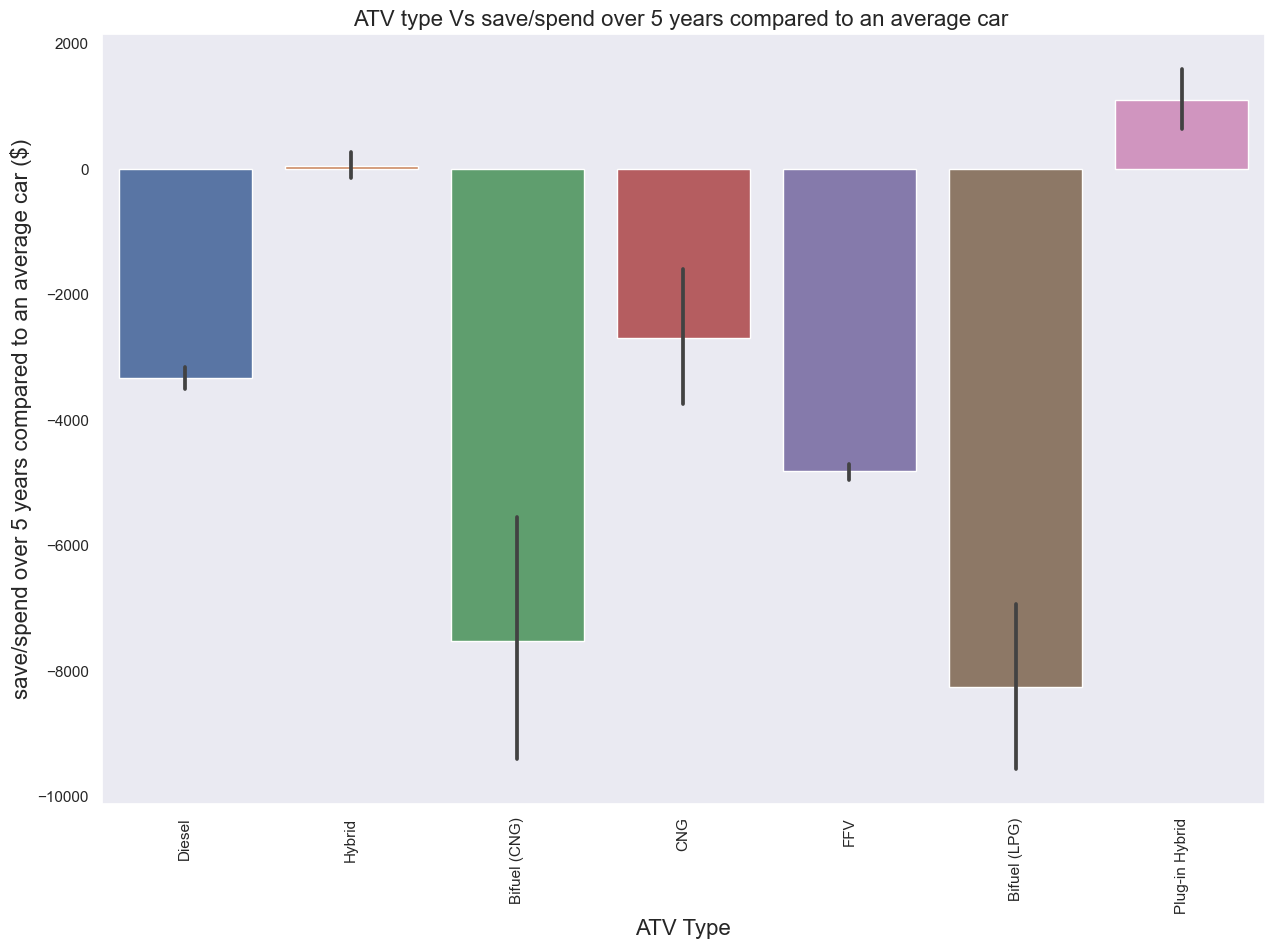

In [82]:
# Chart 4: Chart comparision between ATV types and the amount of spending/saving to an average car.

#Relinquishing the zero values from the column 'atvType'
Relinquish_values_atvType = [0]
df_vehicle = df_vehicle[~df_vehicle['atvType'].isin(Relinquish_values_atvType )]

#setting up the size of the graph for better readability
plt.figure(figsize=(15, 10))

#putting out the bar plot
sns.barplot(x=df_vehicle["atvType"], y=df_vehicle["youSaveSpend"])

print(" ")
print('Chart-4: Bar Chart- Chart comparision between ATV types and the amount of spending/saving to an average car')
print("-----------------------------------------------------------------------------------------------------------")

# labelling the axes and the title
plt.xlabel('ATV Type', fontsize=16)
plt.ylabel('saving/spending over 5 years  ($)' , fontsize=16)
plt.title('ATV type Vs saving/spending over 5 years compared to Vehicles ' , fontsize=16)

#Rotating x axis labels to accomodate all the brand names
plt.xticks(rotation=90)

# Plotting the chart
plt.show()


#Insights
# 1. ATVs which are plug-in hybrid are the ones on which there is savings and the rest of the fuel types incur a loss
# over the 5 year span.
# 2. Biofuels suchs are LPG and CNG have incurred heavy losses and will continue to be so if it is used over long 
# periods of time.


# Chart type: Scatter Plots

Chart-5: Scatter Plot- Emission of Carbon content vs City Milage - For type 1 fuel
-----------------------------------------------------------------------------------------------------------


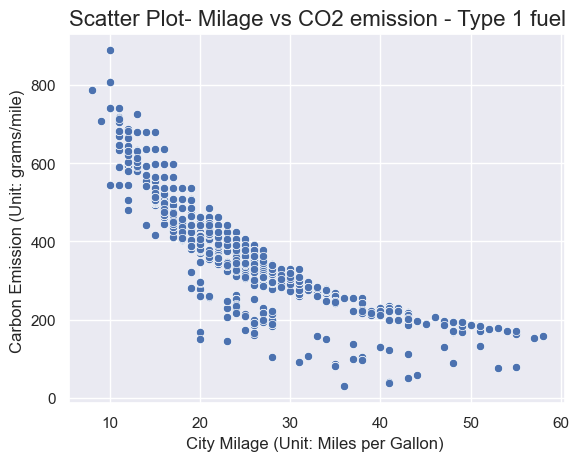

In [83]:
#Chart 5: Emission of carbon content vs Milage inside the city- For type 1 fuel

#Putting out the scatterplot with the below axes variables
sns.scatterplot(x= "city08", y= "co2TailpipeGpm", data= df_vehicle)
sns.set(style="dark")

print('Chart-5: Scatter Plot- Emission of Carbon content vs City Milage - For type 1 fuel')
print("-----------------------------------------------------------------------------------------------------------")

#Adding the necessary X&Y axis labels
plt.xlabel('City Milage (Unit: Miles per Gallon) ', fontsize=12)
plt.ylabel('Carbon Emission (Unit: grams/mile) ', fontsize=12)
plt.title('Scatter Plot- Milage vs CO2 emission - Type 1 fuel', fontsize=16)

#adding grid to the chart for more readability
plt.grid(True)

#Showing the Scatter plot
plt.show()

#insights
# 1. from the graph, it is found that wheneven the milage inside the city comes down there is a significant increase
# in the carbon emission in the atmosphere.

 
Chart-6: Scatter Plot- Carbon dioxide emission vs City Milage - For type 2 fuel
-----------------------------------------------------------------------------------------------------------


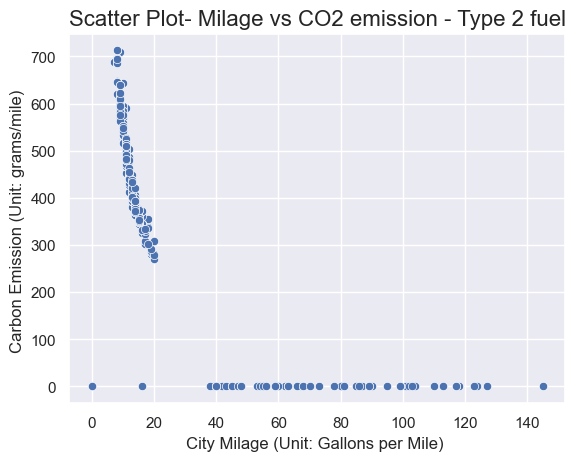

In [84]:
#Emission of carbon contents vs City Milage - For type 2 fuel

#Putting out the scatterplot with the below variables
sns.scatterplot(x= "cityA08", y= "co2TailpipeAGpm", data= df_vehicle)
sns.set(style="darkgrid") 

print(" ")
print('Chart-6: Scatter Plot- Carbon dioxide emission vs City Milage - For type 2 fuel')
print("-----------------------------------------------------------------------------------------------------------")


#Adding the necessary X&Y axis labels
plt.xlabel('City Milage (Unit: Gallons per Mile) ' , fontsize=12)
plt.ylabel('Carbon Emission (Unit: grams/mile) ', fontsize=12)
plt.title('Scatter Plot- Milage vs CO2 emission - Type 2 fuel', fontsize=16)

#Adding grid to the scatter plot for more readability and accuracy
plt.grid(True)

#showing the scatter plot
plt.show()

#insights
# 1. from the graph, it is found that wheneven the milage inside the city comes down there is a significant increase
# in the carbon emission in the atmosphere even for the auxillary fuel.

 
Chart-7: Scatter Plot- Visualisation of Carbon emission relation - For type 1 fuel Vs Type 2 
-----------------------------------------------------------------------------------------------------------


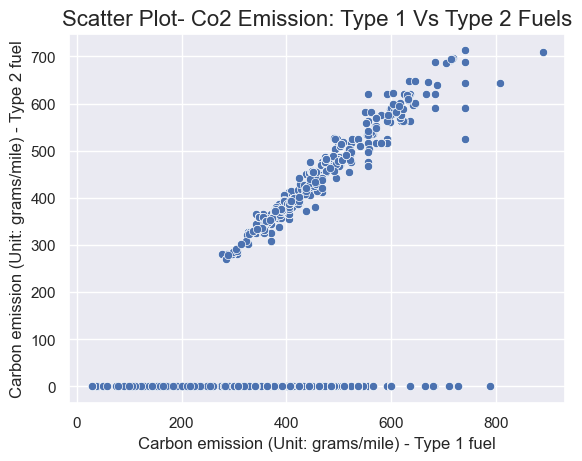

In [85]:
#tailpipe CO2 in grams/mile  vs tailpipe CO2 in grams/mile - For type 1 fuel Vs Type 2 

#Putting out the scatterplot for the below variables
sns.scatterplot(x= "co2TailpipeGpm", y= "co2TailpipeAGpm", data= df_vehicle)

print(" ")
print('Chart-7: Scatter Plot- Visualisation of Carbon emission relation - For type 1 fuel Vs Type 2 ')
print("-----------------------------------------------------------------------------------------------------------")

#Adding the necessary X&Y axis and title 
plt.xlabel('Carbon emission (Unit: grams/mile) - Type 1 fuel', fontsize=12)
plt.ylabel('Carbon emission (Unit: grams/mile) - Type 2 fuel' , fontsize=12)
plt.title('Scatter Plot- Co2 Emission: Type 1 Vs Type 2 Fuels', fontsize=16)

#Adding grid to the scatter plot for more readability and accuracy
plt.grid(True)

#Showing the scatter plot
plt.show()

#insights
# 1. from the graph, it is found that the mean emission value for both the fuel types lies between 250-600 grams/mile.

 
Chart-8: Scatter Plot- Displacement of the engine Vs Annual Fuel cost for type 1 fuel 
-----------------------------------------------------------------------------------------------------------


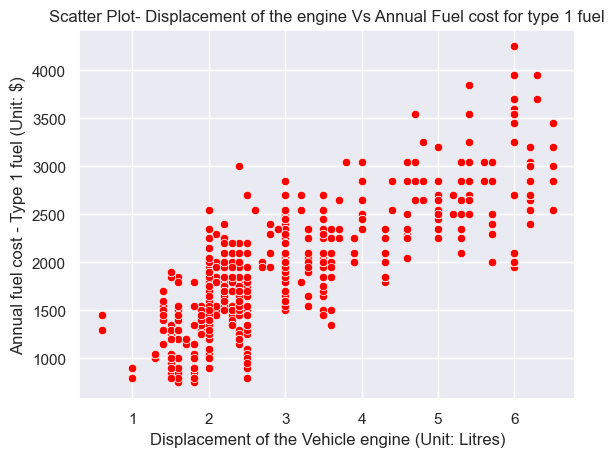

In [86]:
#Displacement of the engine Vs Annual Fuel cost for type 1 fuel

#Putting out the scatter plot for the below variables
sns.scatterplot(x= "displ", y= "fuelCost08", c='red' , data= df_vehicle)
sns.set(style="dark")

print(" ")
print('Chart-8: Scatter Plot- Displacement of the engine Vs Annual Fuel cost for type 1 fuel ')
print("-----------------------------------------------------------------------------------------------------------")

#Labelling of axes & title
plt.xlabel('Displacement of the Vehicle engine (Unit: Litres)')
plt.ylabel('Annual fuel cost - Type 1 fuel (Unit: $)')
plt.title('Scatter Plot- Displacement of the engine Vs Annual Fuel cost for type 1 fuel')

#setting the grid for more readability and accuracy
plt.grid(True)

#Showing the plotted graph
plt.show()

#Insights:
# 1. There is found to to be a positive corelation between the label, whenever the displacement of the engine increases
# the annual fuel cost also increases.
# 2. The plots are mostly found to be more effective when the displacement is between 1.5-2.5 Litres


# Chart type: Line Chart

 
Chart-9: Line Chart- Relationship chart between the Vehicle model Year and Milage of the vehicle (MPG) 
-------------------------------------------------------------------------------------------------------


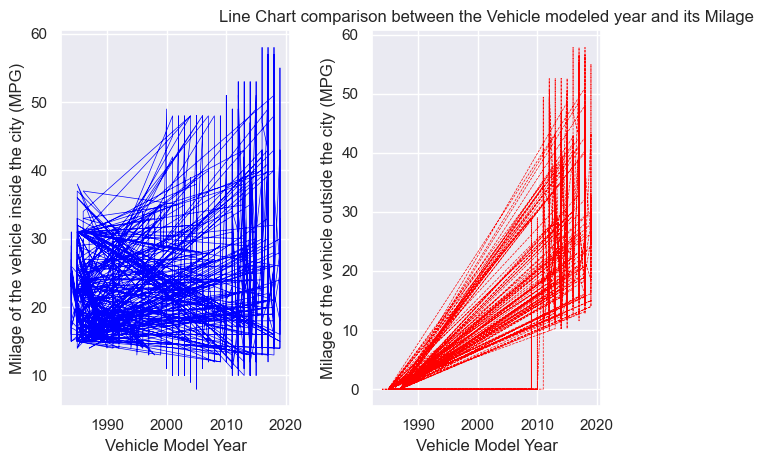

In [87]:
# Visualization between the Vehicle model Year Vs Milage of the vehicle (MPG)

print(" ")
print('Chart-9: Line Chart- Relationship chart between the Vehicle model Year and Milage of the vehicle (MPG) ')
print("-------------------------------------------------------------------------------------------------------")

#Subplot 1: Vehicle model Year Vs Milage of the vehicle inside City limits (MPG)
plt.subplot(1, 2, 1) 

#Labelling the axes 
plt.plot(df_vehicle["year"] , df_vehicle["city08"] , color='blue', linestyle='-', linewidth=0.5)
plt.xlabel('Vehicle Model Year')
plt.ylabel('Milage of the vehicle inside the city (MPG)')

#setting the grid for more readability and accuracy
plt.grid(True)

#subplot 2: Vehicle model Year Vs Milage of the vehicle outside city limits (MPG)

plt.subplot(1, 2, 2) 
plt.plot(df_vehicle["year"] , df_vehicle["city08U"] , color='red', linestyle='--', linewidth=0.5)
plt.plot

#Labelling the axes 
plt.xlabel('Vehicle Model Year')
plt.ylabel('Milage of the vehicle outside the city (MPG)')

plt.title('Line Chart comparison between the Vehicle modeled year and its Milage')

#setting the grid for more readability and accuracy
plt.grid(True)

#adjusts the spacing between the 2 charts
plt.tight_layout()

#Displaying the graph
plt.show()

#insights
# 1. It is found that as the make of the vehicle is newer and newer the milage for the vehicle, irrespective of being inside/outside the city keeps on increasing.
# 2. There is a sudden increase in the vehicle milage from 2003 to 2013

Chart-10: Line Chart- Vehicle model Year Vs EPA range for Highway and city 
--------------------------------------------------------------------------


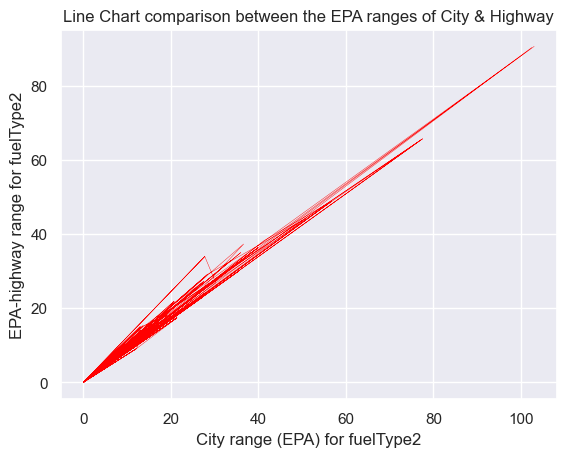

In [95]:
#Chart 10: Line Chart comparison between the EPA for fueltype2 

#Putting out the line chart between the EPA ranges
plt.plot(df_vehicle["rangeCityA"] , df_vehicle["rangeHwyA"] , color='red', linestyle='-', linewidth=0.3)

print('Chart-10: Line Chart- Vehicle model Year Vs EPA range for Highway and city ')
print("--------------------------------------------------------------------------")

#labeling the axes
plt.xlabel('City range (EPA) for fuelType2')
plt.ylabel('EPA-highway range for fuelType2')

#Labeling the title of the line graph
plt.title('Line Chart comparison between the EPA ranges of City & Highway')

#setting the grid for more readability and accuracy
plt.grid(True)

#Displaying the chart
plt.show()

#Insights:
# 1. The chart infers to the fact these 2 fields are dependent of each other and also has a positive slope for the same
# types of cars.


# Chart type: Pie Chart

 
Chart-11: Pie Chart- represent the different types of fuel used for the Vehicles under study 
---------------------------------------------------------------------------------------------
******************************************************
the total specific fuel type counts: Gasoline or E85                1287
Diesel                          976
Regular                         412
Premium or E85                  125
Premium                         125
CNG                              50
Premium and Electricity          47
Regular Gas and Electricity      29
Premium Gas or Electricity       28
Gasoline or natural gas          20
Gasoline or propane               8
Regular Gas or Electricity        3
Midgrade                          2
Name: fuelType, dtype: int64
******************************************************
 The total count of the types: 3112
******************************************************
Catagory Proportions Gasoline or E85                0.413560
Diesel        

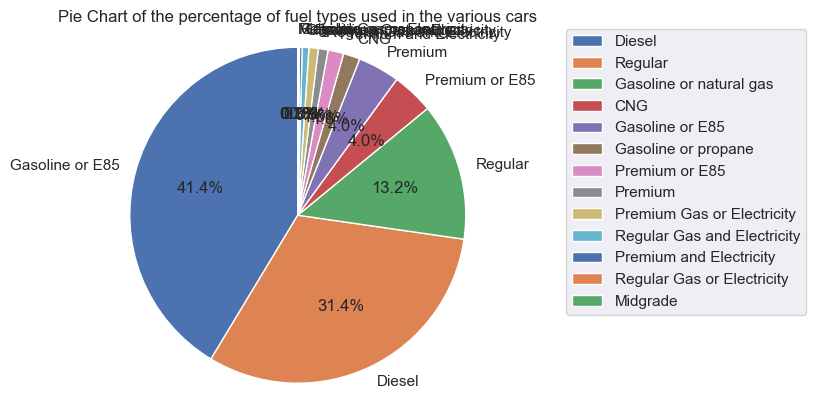

In [89]:
#Chart 11: A pie chart to represent the different types of fuel used and it percentage of usage across all the cars.

print(" ")
print('Chart-11: Pie Chart- represent the different types of fuel used for the Vehicles under study ')
print("---------------------------------------------------------------------------------------------")

# Count the categories
Fueltype_counts = df_vehicle['fuelType'].value_counts()

# Calculate proportions
total_Fueltype_count = Fueltype_counts.sum()
Fueltype_ratio = Fueltype_counts/ total_Fueltype_count

#Displaying the necessary calculated values.
print("******************************************************")
print("the total specific fuel type counts:", Fueltype_counts)
print("******************************************************")
print(" The total count of the types:" , total_Fueltype_count)
print("******************************************************")
print("Catagory Proportions" , Fueltype_ratio)


# Create a pie chart
plt.pie(Fueltype_proportions, labels=Fueltype_proportions.index, autopct='%1.1f%%', startangle=90)

#To maintain an equal aspect ratio so that the pie chart is neat and circular
plt.axis('equal') 

# Add a title
plt.title('Pie Chart of the percentage of fuel types used in the various cars')

#altering the font size of the contents for visual appeal
plt.rcParams['font.size'] = 12

#Displaying the legend/labels of the pie chart.
unique_fuelType = df_vehicle['fuelType'].unique()
plt.legend(unique_fuelType, loc='upper left', bbox_to_anchor=(1.025, 1.025))  

# plot the chart
plt.show()

#Insights:
# 1. Regular gas is the most used fuel (approx 65%) across all the cars which are manufactured between the year 1985-2010
# and the best being premium (approx 28%).
# 2. The usage of electricity as the fuel is constanly on the rise with almost 168 vehicle run solely on and approximately
# around 100 vehicles run with a combination of other fuels.


Chart-12: Pie Chart- Finding out the percentage of Vehicle class under study 
-----------------------------------------------------------------------------
******************************************************
the total specific VClass counts: Midsize Cars                          387
Compact Cars                          334
Standard Pickup Trucks 2WD            239
Sport Utility Vehicle - 4WD           232
Standard Pickup Trucks 4WD            224
Standard Pickup Trucks                214
Sport Utility Vehicle - 2WD           205
Large Cars                            173
Standard Sport Utility Vehicle 4WD    158
Vans, Cargo Type                      119
Subcompact Cars                       100
Vans, Passenger Type                   92
Small Sport Utility Vehicle 4WD        69
Standard Sport Utility Vehicle 2WD     67
Vans                                   62
Small Station Wagons                   53
Minivan - 2WD                          48
Small Sport Utility Vehicle 2WD        47

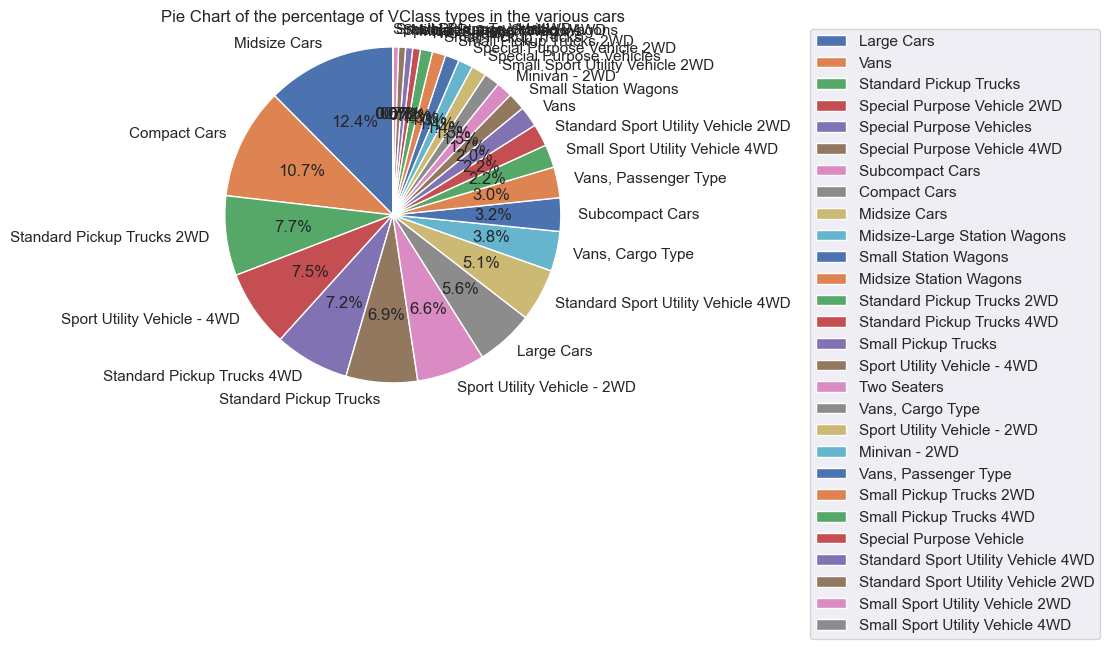

In [90]:
# Chart 12: Pie Chart - Finding out the percentage of Vehicle class under study

print('Chart-12: Pie Chart- Finding out the percentage of Vehicle class under study ')
print("-----------------------------------------------------------------------------")

#Count the categories
VClass_counts = df_vehicle['VClass'].value_counts()

# Calculate proportions
total_VClass_count = VClass_counts.sum()
VClass_ratio = VClass_counts/ total_VClass_count

#Displaying the necessary calculated values.
print("******************************************************")
print("the total specific VClass counts:", VClass_counts)
print("******************************************************")
print(" The total count of the Class types:" , total_VClass_count)
print("******************************************************")
print("Catagory Proportions of VClass" , VClass_ratio)

# Creation of a pie chart
plt.pie(VClass_proportions, labels=VClass_proportions.index, autopct='%1.1f%%', startangle=90)

#To maintain an equal aspect ratio so that the pie chart is neat and circular
plt.axis('equal')  
# Add a title
plt.title('Pie Chart of the percentage of VClass types in the various cars')

#reduce the font size of the contents for visual appeal
plt.rcParams['font.size'] = 12

#Displaying the legend/labels of the pie chart.
distinct_VClass= df_vehicle['VClass'].unique()
plt.legend(distinct_VClass, loc='upper left', bbox_to_anchor=(1.325, 1.025))  

# plot the chart
plt.show()

#Insights:
# 1. According to the chart, Compact cars (14.3%) and sub compact cars(12.6%) are the most preferred Vehicle class types,
# whereas special purpose vehicles are very low on number (approx less than 1% of the total class on display).
# 2. When analysing the vans and the utility vehicle types, they seems to be scarsely present from approximately 2-6% 
# individually. 

# Chart type : Histogram

Chart-13: Histogram - comparison between the spending/saving  
-----------------------------------------------------------------------------


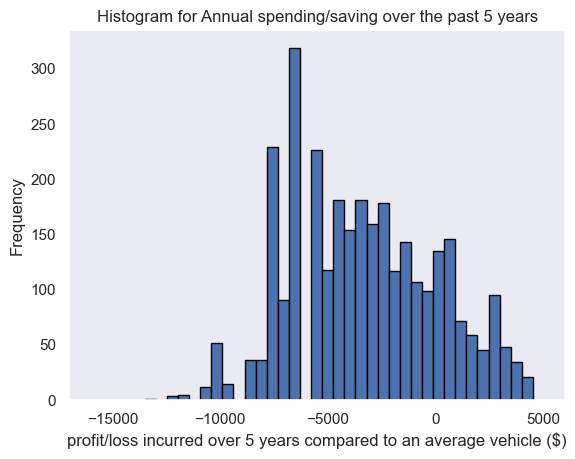

In [96]:
#Chart 13: A histogram chart comparison between the spending/saving 

print('Chart-13: Histogram - comparison between the spending/saving  ')
print("-----------------------------------------------------------------------------")

#Putting out the histogram chart for the below variables
plt.hist(df_vehicle["youSaveSpend"] , bins=35, edgecolor='black')

#Customising up the x axis range
plt.xlim(-17000, 6000, 6000) 

#Labelling the axis & title
plt.xlabel('profit/loss incurred over 5 years compared to an average vehicle ($)')
plt.ylabel('Frequency')
plt.title('Histogram for Annual spending/saving over the past 5 years')

#Showing the histogram
plt.show()

#Insights:
# 1. The major data distribution falls between the -12000(Spending) to +2000(Saving) but the majority percentage of
# car owners tend to spend over the past 5 year period rather than saving.

# Chart Type: Box Chart

Chart-14: Box Chart - analyse the unrounded city Milage for type 1 fuel 
-----------------------------------------------------------------------------


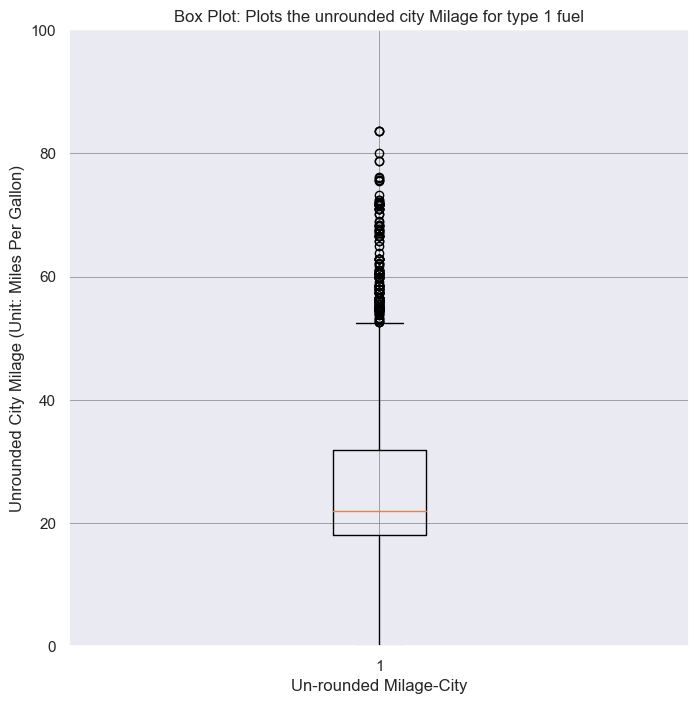

In [97]:
#Chart 14: Box Chart to analyse the unrounded city Milage for type 1 fuel.

print('Chart-14: Box Chart - analyse the unrounded city Milage for type 1 fuel ')
print("-----------------------------------------------------------------------------")

# defining the dimentions and plotting the variable for the box chart
plt.figure(figsize=(8, 8))
plt.boxplot(df_vehicle["UCity"])

#adding grids to the chart for better readability and asthetic appeal
plt.grid(True, linestyle='-', color='grey', linewidth=0.5)

#Customising the y axis limit
plt.ylim(0, 100) 

# Adding labels & title 
plt.xlabel('Un-rounded Milage-City')
plt.ylabel('Unrounded City Milage (Unit: Miles Per Gallon)')
plt.title('Box Plot: Plots the unrounded city Milage for type 1 fuel')

# Show the box plot
plt.show()

#Insights:
# 1. The average value of the milage for unrounded city for fuel type 1 is approximately 21 Miles/Gallon, where falls
# the majority of the data.
# 2. There are few extreme outliers which are present when analyzing the graph, for instance the data points containing
# the values above 39 upto 220 are some.



Chart-15: Box Chart - analyse the displacement of the engines for vehicles under study
--------------------------------------------------------------------------------------


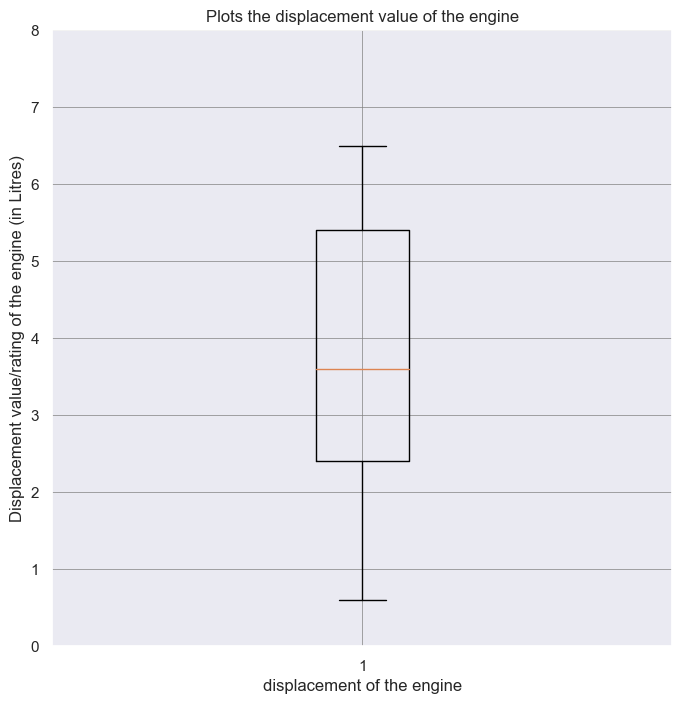

In [93]:
#Chart 15: Box Chart to analyse the displacement of the engines for vehicles under study.

print('Chart-15: Box Chart - analyse the displacement of the engines for vehicles under study')
print("--------------------------------------------------------------------------------------")

# defining the dimentions and the variable for the box chart
plt.figure(figsize=(8, 8))
plt.boxplot(df_vehicle["displ"])

#adding grids to the chart for better readability
plt.grid(True, linestyle='-', color='grey', linewidth=0.5)

#Setting up customised limits
plt.ylim(0, 8) 

# Adding labels and title 
plt.xlabel('displacement of the engine')
plt.ylabel('Displacement value/rating of the engine (in Litres)')
plt.title('Plots the displacement value of the engine')

# Show the box plot
plt.show()


#Insights:
# 1. The mean value of displacement of the engine is approximately 3.5 Litres across all the vehicles under consideration.
# 2. The maximum range value of displacement is between 2.5-5.5 litres.



# Question 3: Correlation Matrix

 
Question 3: Correlation heatmap of the Vehicle dataset
------------------------------------------------------


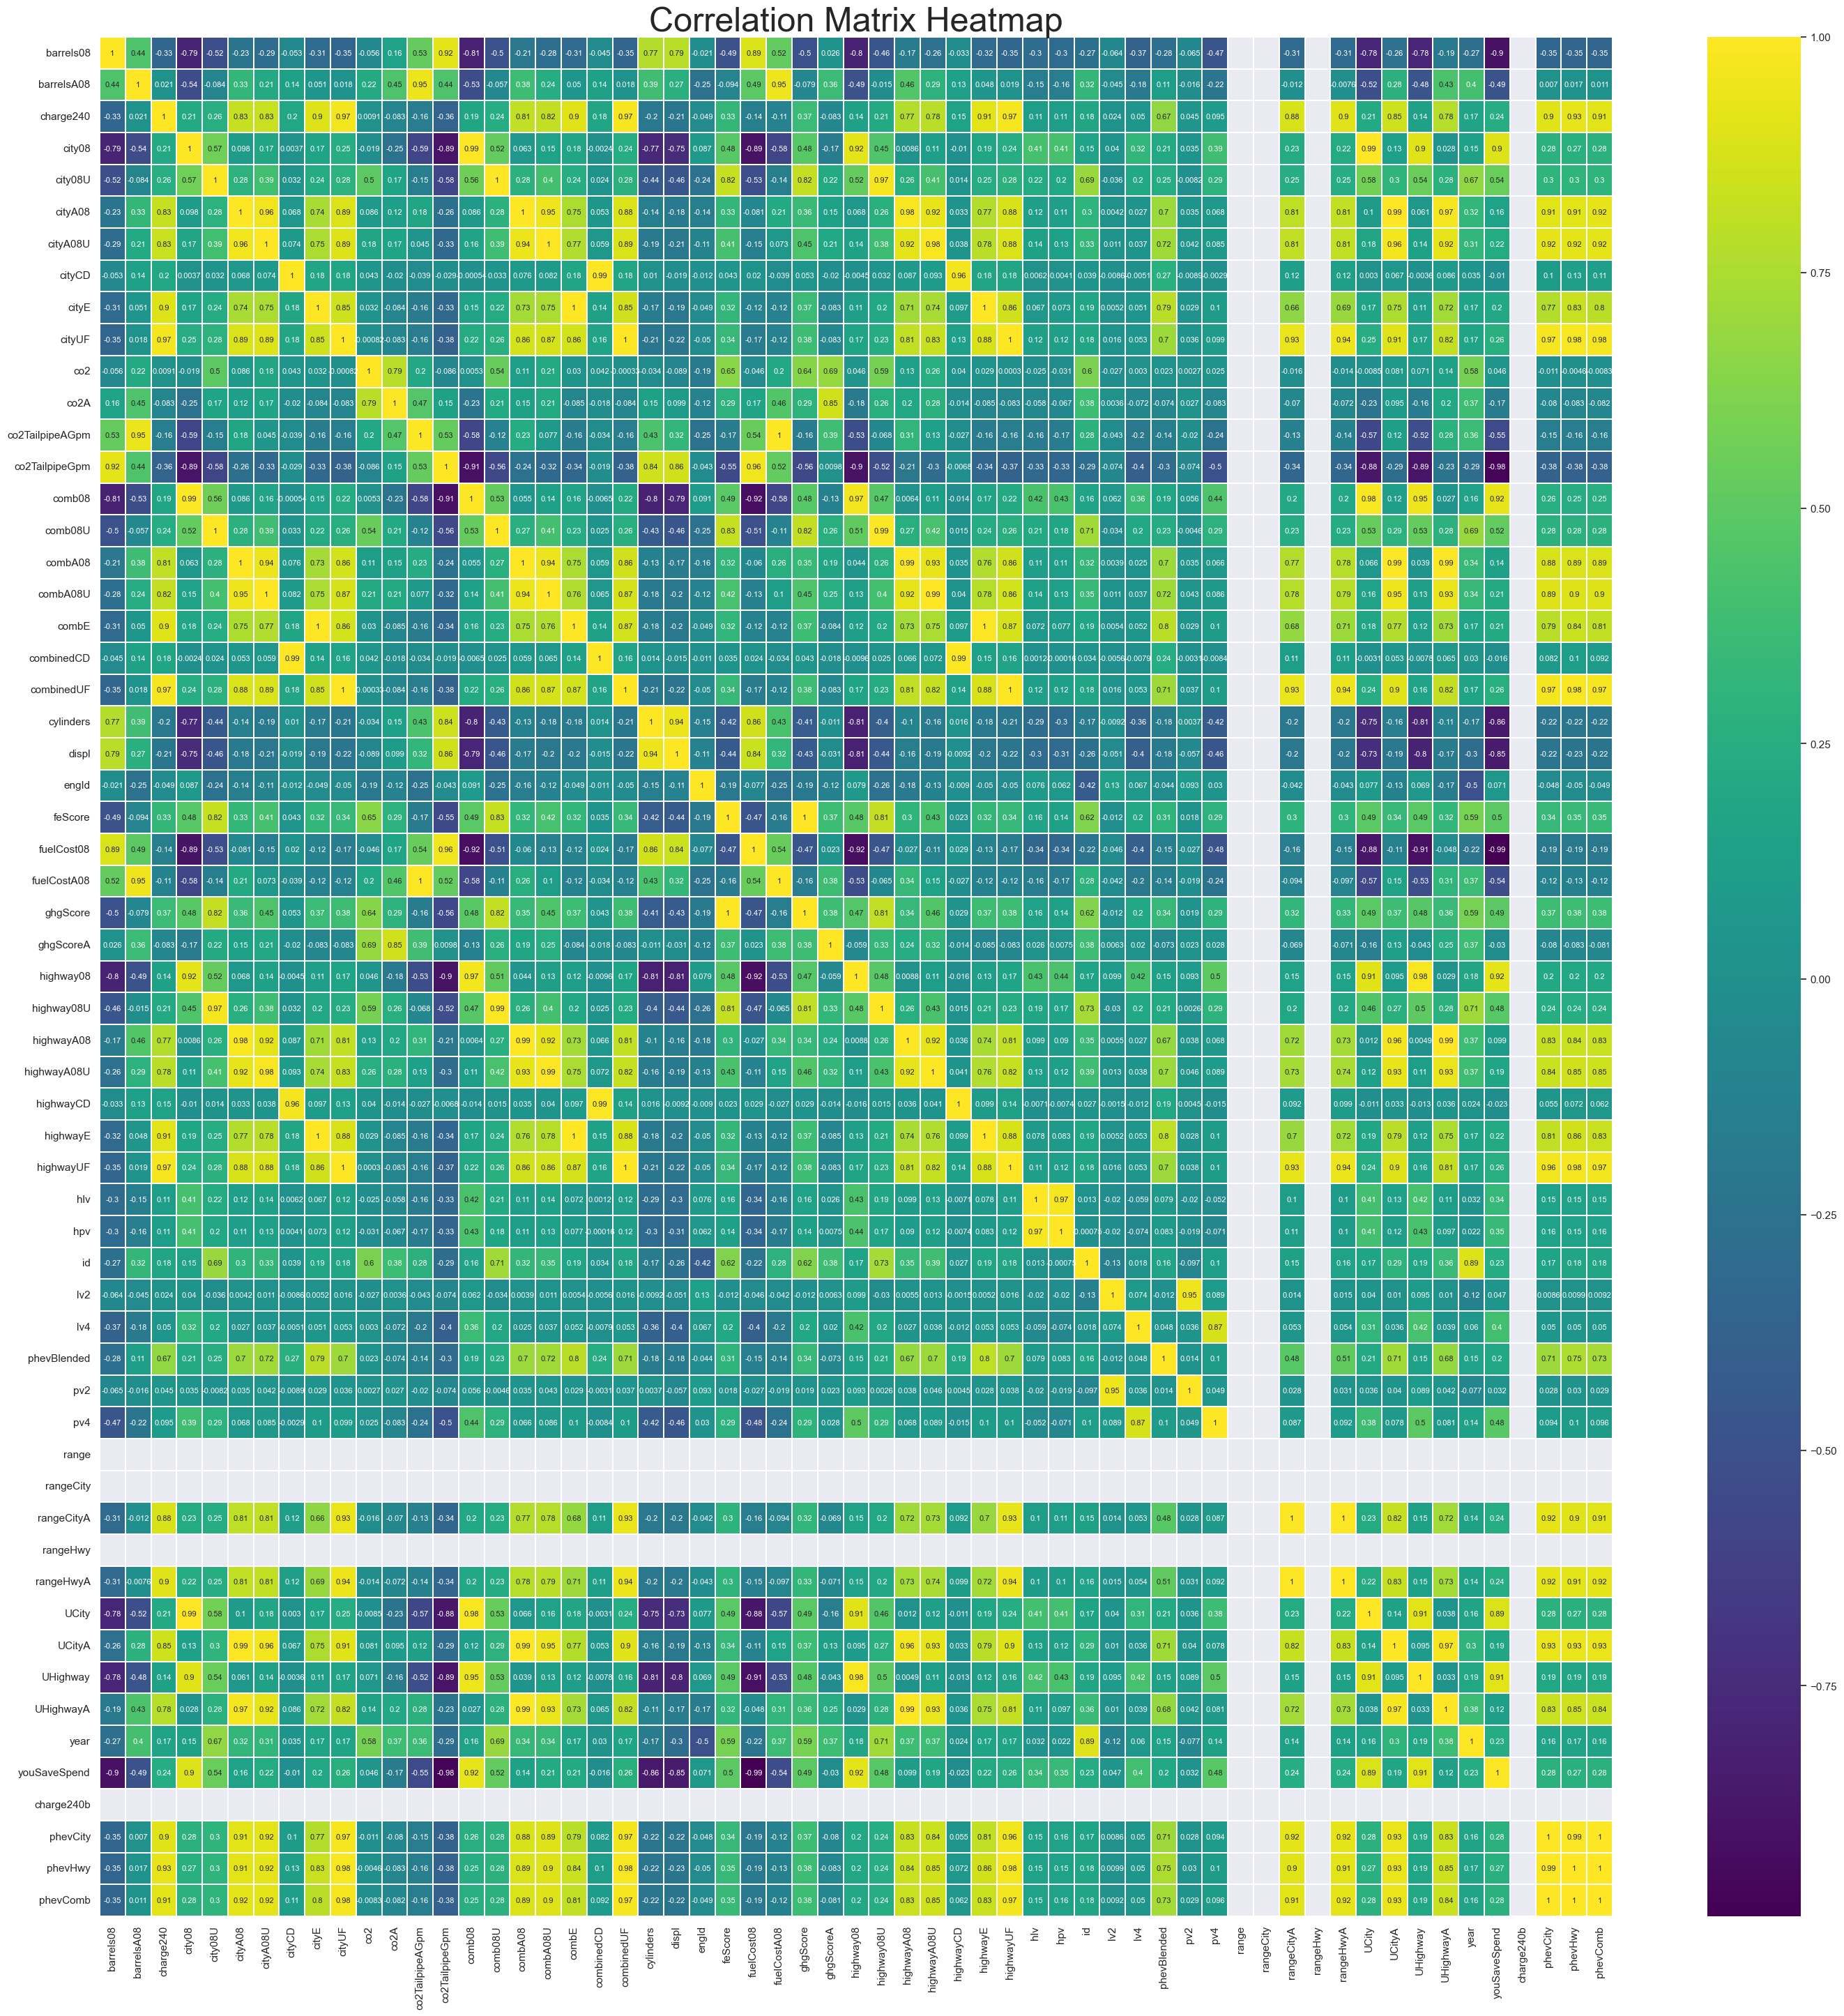

In [98]:
#Creating the correlative heatmap matrix, consisting of only numerical columns
Numerical_heatmap = df_vehicle.corr(numeric_only = True)

print(" ")
print('Question 3: Correlation heatmap of the Vehicle dataset')
print("------------------------------------------------------")

# Setting the dimensions of the figure
plt.figure(figsize=(35, 35))

#Plotting of heatmap 
sns.heatmap(Numerical_heatmap, cmap='viridis', linewidth=.25,annot=True,annot_kws={'size': 8})

#Printing the title of the heatmap
plt.title('Correlation Matrix Heatmap',fontsize=35)

#Displaying the heatmap
plt.show()


# Question 4: Conclusion for Data analysis and visualization 

In [504]:
print("Final Conclusion & Insights on the Vehicle dataset Visualisation:")
print("-----------------------------------------------------------------")
print(" ")
print(" 1) It can be infered that, in a scenario where a vehicle with the automatic axle had less fuel consumption which in reduced the expense on the same. Also, even though the various brands or make used the same interior composition like cylinder - Engine displacement combination, it tend to produced contrasting results from each other on the Fuel efficiency and the Fuel economy score.") 
print(" ")
print(" 2) The most number of prefered type of vehicles where the compact and the midsized cars which constituted more than 25% of the total cars which were on display.")
print(" ")
print(" 3) When coming to ATVs, Electric vehicles gave a positive yield or saved money on the fuel due to its cost. The same could not be said about the Bifuel Vehicles as it incurred heavy spending when comparing over a 5-year period.")
print(" ")
print(" 4) Finally, There is found to be a positive correlation between the fuel consumption with the Co2 emission as there"
"found to increase when ever there is an increase in the former. This act inturn increase the total value/total miles travelled of the "
"but when looking indepth, the milage still decreases and the Fuel efficiency score too.")
print(" ")
print("-----------X-------------X---------------X--------------X---------")



Final Conclusion & Insights on the Vehicle dataset Visualisation:
-----------------------------------------------------------------
 
 1) It can be infered that, in a scenario where a vehicle with the automatic axle had less fuel consumption which in reduced the expense on the same. Also, even though the various brands or make used the same interior composition like cylinder - Engine displacement combination, it tend to produced contrasting results from each other on the Fuel efficiency and the Fuel economy score.
 
 2) The most number of prefered type of vehicles where the compact and the midsized cars which constituted more than 25% of the total cars which were on display.
 
 3) When coming to ATVs, Electric vehicles gave a positive yield or saved money on the fuel due to its cost. The same could not be said about the Bifuel Vehicles as it incurred heavy spending when comparing over a 5-year period.
 
 4) Finally, There is found to be a positive correlation between the fuel consumpti